Author: Alan Mössinger

# **Machine Learning - Credit Card Fraud Detection


Machine learning (ML) modeling skills by using two popular classification models to recognize fraudulent credit card transactions. These models are: Decision Tree and Support Vector Machine. Real dataset application to train each of these models. The dataset includes information about transactions made by credit cards in September 2013 by European cardholders. The trained model is apllied to assess if a credit card transaction is legitimate or not.

Libraries like Scikit-Learn Python interface and the Python API offered by the Snap Machine Learning (Snap ML) are imported. Snap ML is a high-performance IBM library for ML modeling. It provides highly-efficient CPU/GPU implementations of linear models and tree-based models. Snap ML not only accelerates ML algorithms through system awareness, but it also offers novel ML algorithms with best-in-class accuracy. For more information, please visit [snapml](https://ibm.biz/BdPfxy) information page.


## Objectives


* Perform basic data preprocessing in Python
* Model a classification task using the Scikit-Learn and Snap ML Python APIs
* Train Suppport Vector Machine and Decision Tree models using Scikit-Learn and Snap ML
* Run inference and assess the quality of the trained models
* Run metrics to evaluate the models



<div id="Introduction">
    <h2>Introduction</h2>
    <br>In order to build a model that predicts if a credit card transaction is fraudulent or not you can model the problem as a binary classification problem. A transaction belongs to the positive class (1) if it is a fraud, otherwise it belongs to the negative class (0).
    <br>
    <br>You have access to transactions that occured over a certain period of time. The majority of the transactions are normally legitimate and only a small fraction are non-legitimate. Thus, typically you have access to a dataset that is highly unbalanced. This is also the case of the current dataset: only 492 transactions out of 284,807 are fraudulent (the positive class - the frauds - accounts for 0.172% of all transactions).
    <br>
    <br>To train the model you can use part of the input dataset and the remaining data can be used to assess the quality of the trained model. 


In [1]:
!pip install the opendatasets package
!pip install opendatasets

import opendatasets as od

# download the dataset (this is a Kaggle dataset)
# during download you will be required to input your Kaggle username and password
od.download("https://www.kaggle.com/mlg-ulb/creditcardfraud")

  Using cached the-0.1.5.tar.gz (10 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached package-0.1.1.tar.gz (13 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [7 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\NTR0\AppData\Local\Temp\pip-install-8zox1_j8\package_2b3a40dac18e4a22afb6eeca4e4c1660\setup.py", line 4
      print """
      ^^^^^^^^^
  SyntaxError: Missing parentheses in call to 'print'. Did you mean print(...)?
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


Skipping, found downloaded files in ".\creditcardfraud" (use force=True to force download)


<div id="import_libraries">
    <h2>Import Libraries</h2>
</div>


In [2]:
# Snap ML is available on PyPI. To install it simply run the pip command below.
!pip install snapml

In [3]:
# Import the libraries we need to use in this lab
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import time
import warnings
warnings.filterwarnings('ignore')

<div id="dataset_analysis">
    <h2>Dataset Analysis</h2>
</div>


In this section you will read the dataset in a Pandas dataframe and visualize its content. You will also look at some data statistics. 

Note: A Pandas dataframe is a two-dimensional, size-mutable, potentially heterogeneous tabular data structure. For more information: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html. 

If you can't load the data directly with your notebook from Kaggle, just go to the site and download ii ando follow the example as below.

#Uncomment the following lines if you are unable to download the dataset using the Kaggle website.

#url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/creditcard.csv"
#raw_data=pd.read_csv(url)
#print("There are " + str(len(raw_data)) + " observations in the credit card fraud dataset.")
#print("There are " + str(len(raw_data.columns)) + " variables in the dataset.")
#raw_data.head()

In [4]:
# read the input data
raw_data = pd.read_csv('creditcardfraud/creditcard.csv')
print("There are " + str(len(raw_data)) + " observations in the credit card fraud dataset.")
print("There are " + str(len(raw_data.columns)) + " variables in the dataset.")

# display the first rows in the dataset
raw_data.head()

There are 284807 observations in the credit card fraud dataset.
There are 31 variables in the dataset.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In practice, a financial institution may have access to a much larger dataset of transactions. To simulate such a case, we will inflate the original one 10 times.


In [5]:
n_replicas = 10

# inflate the original dataset
big_raw_data = pd.DataFrame(np.repeat(raw_data.values, n_replicas, axis=0), columns=raw_data.columns)

print("There are " + str(len(big_raw_data)) + " observations in the inflated credit card fraud dataset.")
print("There are " + str(len(big_raw_data.columns)) + " variables in the dataset.")

# display first rows in the new dataset
df = big_raw_data
df.head()

There are 2848070 observations in the inflated credit card fraud dataset.
There are 31 variables in the dataset.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
2,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
3,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
4,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0


In [6]:
df.shape

(2848070, 31)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,2848070.0,9.481386e+04,47488.070922,0.000000,54201.000000,84692.000000,139321.000000,172792.000000
V1,2848070.0,1.066506e-15,1.958693,-56.407510,-0.920375,0.018109,1.315648,2.454930
V2,2848070.0,3.519096e-16,1.651306,-72.715728,-0.598555,0.065486,0.803728,22.057729
V3,2848070.0,-1.070418e-15,1.516253,-48.325589,-0.890372,0.179846,1.027201,9.382558
V4,2848070.0,2.068746e-15,1.415866,-5.683171,-0.848643,-0.019847,0.743354,16.875344
V5,2848070.0,1.096205e-15,1.380245,-113.743307,-0.691602,-0.054336,0.611927,34.801666
V6,2848070.0,1.498769e-15,1.332269,-26.160506,-0.768296,-0.274187,0.398569,73.301626
V7,2848070.0,-5.666639e-16,1.237092,-43.557242,-0.554084,0.040103,0.570446,120.589494
V8,2848070.0,1.029064e-16,1.194351,-73.216718,-0.208631,0.022358,0.327346,20.007208
V9,2848070.0,-2.423929e-15,1.098630,-13.434066,-0.643099,-0.051429,0.597140,15.594995


In [8]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
#Ckeck out the data types
print(df.dtypes)

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object


Each row in the dataset represents a credit card transaction. As shown above, each row has 31 variables. One variable (the last variable in the table above) is called Class and represents the target variable. Your objective will be to train a model that uses the other variables to predict the value of the Class variable. Let's first retrieve basic statistics about the target variable.

Note: For confidentiality reasons, the original names of most features are anonymized V1, V2 .. V28. The values of these features are the result of a PCA transformation and are numerical.
The feature 'Class' is the target variable and it takes two values: 1 in case of fraud and 0 otherwise.


In [10]:
#Check out for missing values
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


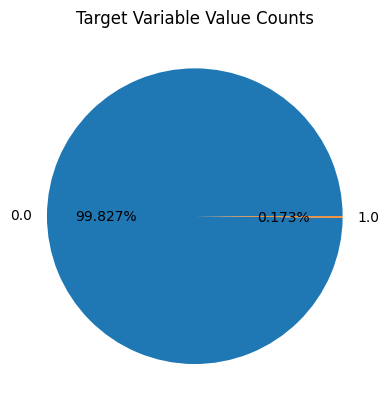

In [11]:
# get the set of distinct classes
labels = df.Class.unique()

# get the count of each class
sizes = df.Class.value_counts().values

# plot the class value counts
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Target Variable Value Counts')
plt.show()


As shown above, the Class variable has two values: 0 (the credit card transaction is legitimate) and 1 (the credit card transaction is fraudulent). 
Thus, you need to model a binary classification problem. Moreover, the dataset is highly unbalanced, the target variable classes are 
not represented equally. 
This case requires special attention when training or when evaluating the quality of a model. One way of handing this case at train time 
is to bias the model to 
pay more attention to the samples in the minority class. The models under the current study will be configured to take into account the class 
weights of the samples at train/fit time.


# Preprocessing


The credit card transactions have different amounts. Could you plot a histogram that shows the distribution of these amounts? What is the range of these amounts (min/max)? Could you print the 90th percentile of the amount values?


 Statistics for Time:
 Mean 94813.85957508067
 Median 84692.0
 Standard Deviation 47488.0709223863
 Skewness: -0.0355674494136015

 Statistics for V1:
 Mean 1.0665064167124183e-15
 Median 0.0181087991615309
 Standard Deviation 1.9586927090805992
 Skewness: -3.280651752189097

 Statistics for V2:
 Mean 3.5190959539399205e-16
 Median 0.0654855563960555
 Standard Deviation 1.6513059703778916
 Skewness: -4.624843651135028

 Statistics for V3:
 Mean -1.0704182974234675e-15
 Median 0.179846343563544
 Standard Deviation 1.5162526094657065
 Skewness: -2.2401448217643876

 Statistics for V4:
 Mean 2.068746221743311e-15
 Median -0.0198465294811989
 Standard Deviation 1.4158663378412113
 Skewness: 0.6762888923191643

 Statistics for V5:
 Mean 1.0962047763963032e-15
 Median -0.0543358267364858
 Standard Deviation 1.3802445532151386
 Skewness: -2.425889997028171

 Statistics for V6:
 Mean 1.4987692352833733e-15
 Median -0.274187076506651
 Standard Deviation 1.3322689847439155
 Skewness: 1.826572006

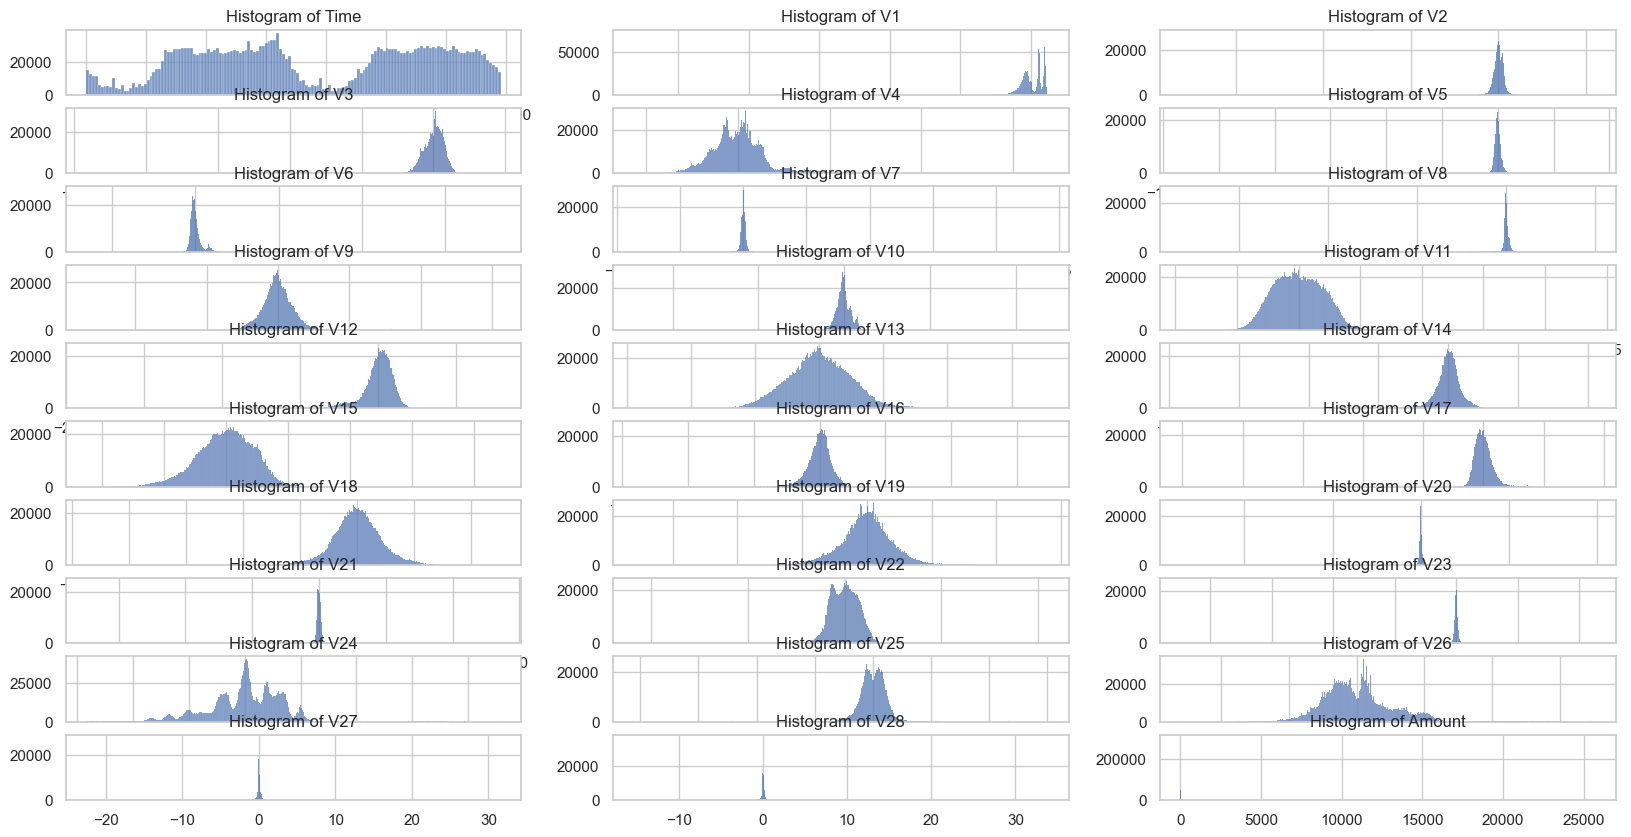

In [12]:
import seaborn as sns

# plot histograms of each parameter
#setting the aesthetic for seaborn plots
sns.set(style='whitegrid')

#Filter numeric data
numeric_data = df.select_dtypes(include=['number'])

n_rows = 10
n_cols = 3

#Determine the total number of plots
total_plots = min(len(numeric_data.columns), n_rows * n_cols) 

#Create a figure and a set of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize = (20, 10))

#Flatten the axes array for easy indexing
axes = axes.flatten()

# iterate over each column in the dataframe
for i, column in enumerate(numeric_data.columns[:total_plots]):
    #plot the histograms
    sns.histplot(numeric_data[column], kde=False, ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

    
#calculate and print the statistical values

    mean = df[column].mean()
    median = df[column].median()
    std_dev = df[column].std()
    skewness = df[column].skew()
    
    print(f' Statistics for {column}:')
    print(f' Mean {mean}')
    print(f' Median {median}')
    print(f' Standard Deviation {std_dev}')
    print(f' Skewness: {skewness}\n')

plt.tight_layout
plt.show()


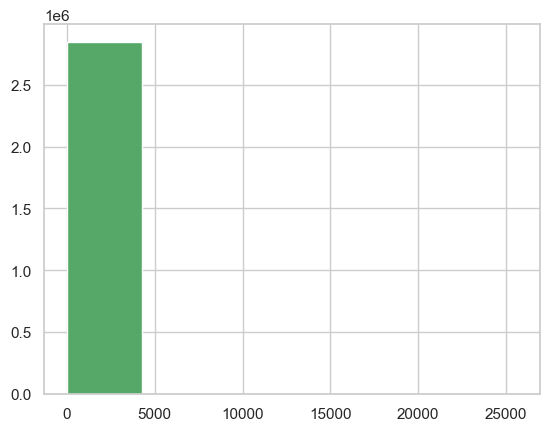

Minimum amount value is  0.0
Maximum amount value is  25691.16
90% of the transactions have an amount less or equal than  203.0


In [13]:
# we provide our solution here
plt.hist(big_raw_data.Amount.values, 6, histtype='bar', facecolor='g')
plt.show()

print("Minimum amount value is ", np.min(big_raw_data.Amount.values))
print("Maximum amount value is ", np.max(big_raw_data.Amount.values))
print("90% of the transactions have an amount less or equal than ", np.percentile(raw_data.Amount.values, 90))

# Exploratory data analysis

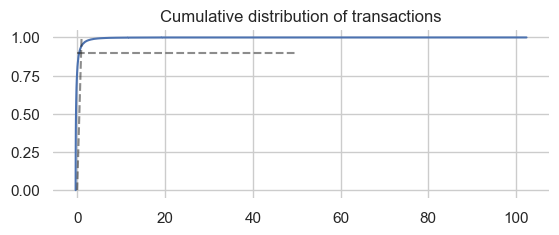

In [27]:
#Cumulative distribution showing that 90% have an amount less than around 200
from statsmodels.distributions.empirical_distribution import ECDF

e = ECDF(df['Amount'])
plt.subplot(2,1,1)
plt.plot(e.x, e.y)
plt.title('Cumulative distribution of transactions')
plt.plot([0, 50], [0.90, 0.90], 'k--', alpha=0.5)
plt.plot(df['Amount'].quantile(0.90), df['Amount'].quantile(0.90),
        [0,1], 'k--', alpha = 0.5)
plt.box(False)


<div id="dataset_preprocessing">
    <h2>Dataset Preprocessing</h2>
</div>


In this subsection you will prepare the data for training. 


In [15]:
# data preprocessing such as scaling/normalization is typically useful for 
# linear models to accelerate the training convergence

'''Data normalization and data scaling are two important techniques used in data preprocessing. They are used to transform the values of 
numeric variables so that the transformed data points have specific helpful properties. These properties can be exploited to create better 
features and models1.
Data Normalization: Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization 
is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values
or losing information2. Normalization is required only when features have different ranges2. For example, consider a data set containing
two features, age, and income. Where age ranges from 0–100, while income ranges from 0–100,000 and higher2. In such cases, normalization 
helps to bring all the values of numeric columns in the dataset to a common scale2.
Data Scaling: Data scaling is a method used to standardize the range of independent variables or features of data. In data processing, it is 
also known as data normalization and is generally performed during the data preprocessing step1. Data scaling is important when we compare 
measurements that have different units2. Variables that are measured at different scales do not contribute equally to the analysis and might 
end up creating a bias2. For example, A variable that ranges between 0 and 1000 will outweigh a variable that ranges between 0 and 12. 
Using these variables without standardization will give the variable with the larger range weight of 1000 in the analysis2. Transforming
the data to comparable scales can prevent this problem2.
In conclusion, normalization and scaling are important steps in data mining, as they can help to improve the performance of machine learning
algorithms by scaling the input features to a common scale3. This can help to reduce the impact of outliers and improve the accuracy of the model3.
Learn more:
1. towardsai.net
2. towardsai.net
3. geeksforgeeks.org
4. plutora.com
5. u-next.com'''


# standardize features by removing the mean and scaling to unit variance
df.iloc[:, 1:30] = StandardScaler().fit_transform(df.iloc[:, 1:30])

'''This line is normalizing or scaling the data in your DataFrame big_raw_data. The iloc[:, 1:30] part is selecting all
rows (:) and columns from 1 to 29 (Python uses 0-based indexing and the end index is exclusive). The StandardScaler().fit_transform() 
part is where the scaling happens. StandardScaler is a function from the sklearn library that standardizes features by removing the 
mean and scaling to unit variance. The fit_transform() function fits the scaler to the data and then transforms the data. The result
is that the selected columns of your DataFrame are now scaled.'''

'''The StandardScaler().fit_transform() function from the sklearn library in Python is used to standardize features by 
removing the mean and scaling to unit variance. The standard score of a sample x is calculated as:
z=s(x−u)​
Where:

u is the mean of the training samples.
s is the standard deviation of the training samples.

The fit_transform() function is a combination of two methods: fit() and transform(). The fit() method calculates the 
    parameters u and s based on the given data. The transform() method applies the transformation to any particular dataset.
So, fit_transform() is a method in sklearn that first fits the model to the data and then transforms the data according to
the fitted model. This is often more efficient than calling fit() and transform() separately, especially for large datasets.
In the end each column will have a standard deviaton of 1 and mean of 0'''


data_matrix = df.values
'''This line is converting your DataFrame into a numpy array. The values attribute of 
a DataFrame returns the numpy representation of the DataFrame. So data_matrix is now a numpy array that contains the
same data as your DataFrame.'''
     

# X: feature matrix (for this analysis, we exclude the Time variable from the dataset)
X = data_matrix[:, 1:30]

# y: labels vector
y = data_matrix[:, 30]


'''The function normalize(X, norm="l1") is a method from the sklearn 
library in Python that is used to normalize the data. The parameter norm="l1" specifies that L1 normalization should be applied.
L1 normalization modifies the values of the array (or DataFrame) X such that the sum of the absolute values of each 
row equals 11. This is particularly useful when you want to make your data comparable in terms of magnitude, 
but the exact values (or their sign) are not important1.

Here’s how it works:
For each row in your dataset, calculate the sum of the absolute values of the elements in the row.
Divide each element in the row by the sum calculated in step 1.
The result is a new dataset where the sum of the absolute values of each row equals 11. This can be useful in
various machine learning algorithms that are sensitive to the scale of the input features2
# data normalization'''
X = normalize(X, norm="l1")

# print the shape of the features matrix and the labels vector
print('X.shape=', X.shape, 'y.shape=', y.shape)

X.shape= (2848070, 29) y.shape= (2848070,)


<div id="dataset_split">
    <h2>Modeling: Dataset Train/Test Split</h2>
</div>


Now that the dataset is ready for building the classification models, you need to first divide the pre-processed dataset into a subset to be used for training the model (the train set) and a subset to be used for evaluating the quality of the model (the test set).


In [16]:
'''Here’s what each parameter does:

X, y: These are the feature matrix and the target vector, respectively. X contains the independent variables (or features), 
and y contains the dependent variable (or target).

test_size=0.3: This means that 30% of the data will be used for the test dataset, and the remaining 70% will be used for the training dataset.

random_state=42: This is used for initializing the internal random number generator, which will decide the splitting of data into 
train and test indices. Providing a particular value (like 42) makes the outcome deterministic, 
meaning that the split will always be the same every time the code is run.

stratify=y: This ensures that the proportion of values in the sample produced will be the same as the proportion of values provided 
to the stratify parameter. In this case, it ensures that the train and test datasets have the same proportions of class labels as the 
input dataset. This is particularly useful for unbalanced datasets.

So, in summary, this line of code is splitting your dataset into a training set and a test set. The training set contains 70% of the
original data, and the test set contains 30%. The split is deterministic and stratified, meaning that the class proportions in the 
training and test datasets are the same as in the original data.'''

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)       
print('X_train.shape=', X_train.shape, 'Y_train.shape=', y_train.shape)
print('X_test.shape=', X_test.shape, 'Y_test.shape=', y_test.shape)

X_train.shape= (1993649, 29) Y_train.shape= (1993649,)
X_test.shape= (854421, 29) Y_test.shape= (854421,)


<div id="dt_sklearn">
    <h2>Build a Decision Tree Classifier model with Scikit-Learn</h2>
</div>


In [17]:
#Treating class inbalance

'''The function compute_sample_weight('balanced', y_train) is a method from the sklearn library 
in Python that is used to estimate sample weights for unbalanced datasets1.

Here’s what each parameter does:

'balanced': This is the class weight. If 'balanced', class weights will be given by n_samples / (n_classes * np.bincount(y)). 
This results in a balanced dataset, which can help improve the performance of many machine learning algorithms1.

y_train: This is the target vector. It contains the class labels for each sample in the training set1.

The function returns an array of sample weights. In the context of your code, w_train is an array of sample weights 
for the training set. These weights can be used in the training process to give more importance to under-represented classes, 
thus addressing the class imbalance1.'''

# compute the sample weights to be used as input to the train routine so that 
# it takes into account the class imbalance present in this dataset

w_train = compute_sample_weight('balanced', y_train)

# import the Decision Tree Classifier Model from scikit-learn
from sklearn.tree import DecisionTreeClassifier

# for reproducible output across multiple function calls, set random_state to a given integer value
sklearn_dt = DecisionTreeClassifier(max_depth=4, random_state=35)

# train a Decision Tree Classifier using scikit-learn
t0 = time.time()
sklearn_dt.fit(X_train, y_train, sample_weight=w_train)
sklearn_time = time.time()-t0
print("[Scikit-Learn] Training time (s):  {0:.5f}".format(sklearn_time))

[Scikit-Learn] Training time (s):  35.89721


Characteristics of Class Imbalance:
Disproportionate Class Distribution: For example, in a binary classification problem, you might have 90% of your samples belonging to 
Class 0 and only 10% belonging to Class 1. This imbalance can be even more extreme in some cases.
Impact on Model Performance: Many machine learning algorithms assume or expect balanced class distribution or an equal misclassification cost. 
When this assumption is violated, models might become biased towards the majority class, often at the expense of the minority class.
Typical in Certain Domains: Class imbalance is particularly common in specific domains such as fraud detection, medical diagnosis, and anomaly 
detection, where the event of interest (fraud, disease, anomaly) is rare compared to the normal state.
Challenges Posed by Class Imbalance:
Model Bias: The learning algorithm might ignore the minority class, leading to poor model performance, especially in predicting the minority class.
Evaluation Metrics Misleading: Traditional metrics like accuracy can be misleading in the context of imbalanced datasets. For instance, in a 
dataset where 95% of the samples are of one class, a model can achieve 95% accuracy by simply predicting the majority class for all instances.
Addressing Class Imbalance:
Resampling Techniques:
Oversampling the Minority Class: Increasing the number of samples in the minority class, for instance, by duplicating existing samples or 
creating synthetic samples (e.g., using SMOTE - Synthetic Minority Over-sampling Technique).
Undersampling the Majority Class: Reducing the number of samples in the majority class. This can lead to a significant reduction of data, 
potentially discarding useful information.
Algorithmic Level Approaches:
Using algorithms that are inherently robust to class imbalance.
Modifying existing algorithms to make them more sensitive to the minority class.
Cost-Sensitive Learning:
Assigning a higher misclassification cost to the minority class.
Evaluation Metrics:
Using metrics that are more informative for imbalanced datasets, such as Precision, Recall, F1-score, ROC-AUC, etc.
Ensemble Methods:
Using ensemble learning methods like Bagging, Boosting, or Random Forest, which can improve model performance on imbalanced datasets.
In practice, handling class imbalance often involves a combination of these techniques, alongside a thorough understanding of the problem 
domain and the specific data

<div id="dt_snapml">
    <h2>Build a Decision Tree Classifier model with Snap ML</h2>
</div>


In [18]:
# if not already computed, 
# compute the sample weights to be used as input to the train routine so that 
# it takes into account the class imbalance present in this dataset
# w_train = compute_sample_weight('balanced', y_train)

# import the Decision Tree Classifier Model from Snap ML
from snapml import DecisionTreeClassifier

# Snap ML offers multi-threaded CPU/GPU training of decision trees, unlike scikit-learn
# to use the GPU, set the use_gpu parameter to True
snapml_dt = DecisionTreeClassifier(max_depth=4, random_state=45, use_gpu=True)

# to set the number of CPU threads used at training time, set the n_jobs parameter
# for reproducible output across multiple function calls, set random_state to a given integer value
snapml_dt = DecisionTreeClassifier(max_depth=4, random_state=45, n_jobs=4)

# train a Decision Tree Classifier model using Snap ML
t0 = time.time()
snapml_dt.fit(X_train, y_train, sample_weight=w_train)
snapml_time = time.time()-t0
print("[Snap ML] Training time (s):  {0:.5f}".format(snapml_time))

[Snap ML] Training time (s):  2.74322


<div id="dt_sklearn_snapml">
    <h2>Evaluate the Scikit-Learn and Snap ML Decision Tree Classifier Models</h2>
</div>


In [19]:
# Snap ML vs Scikit-Learn training speedup
training_speedup = sklearn_time/snapml_time
print('[Decision Tree Classifier] Snap ML vs. Scikit-Learn speedup : {0:.2f}x '.format(training_speedup))

# run inference and compute the probabilities of the test samples 
# to belong to the class of fraudulent transactions
sklearn_pred = sklearn_dt.predict_proba(X_test)[:,1]

# evaluate the Compute Area Under the Receiver Operating Characteristic 
# Curve (ROC-AUC) score from the predictions
sklearn_roc_auc = roc_auc_score(y_test, sklearn_pred)
print('[Scikit-Learn] ROC-AUC score : {0:.3f}'.format(sklearn_roc_auc))

# run inference and compute the probabilities of the test samples
# to belong to the class of fraudulent transactions
snapml_pred = snapml_dt.predict_proba(X_test)[:,1]

# evaluate the Compute Area Under the Receiver Operating Characteristic
# Curve (ROC-AUC) score from the prediction scores
snapml_roc_auc = roc_auc_score(y_test, snapml_pred)   
print('[Snap ML] ROC-AUC score : {0:.3f}'.format(snapml_roc_auc))

[Decision Tree Classifier] Snap ML vs. Scikit-Learn speedup : 13.09x 
[Scikit-Learn] ROC-AUC score : 0.966
[Snap ML] ROC-AUC score : 0.966


# Plot ROC curves

The Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) are widely used metrics for evaluating the performance of 
classification models, particularly in binary classification tasks.

ROC Curve
What It Represents: The ROC curve is a graphical representation of a model's diagnostic ability. 
It plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings.

True Positive Rate (TPR): Also known as Sensitivity or Recall, TPR is calculated as TP / (TP + FN), where TP is the 
number of true positives and FN is the number of false negatives. It measures how well a model identifies positive outcomes.

False Positive Rate (FPR): FPR is calculated as FP / (FP + TN), where FP is the number of false positives and TN is the 
number of true negatives. It measures the rate at which a model incorrectly classifies negative outcomes as positive.

Thresholds: The ROC curve is created by plotting TPR and FPR at different thresholds. A threshold is a value used to decide
whether a given prediction should be classified as positive or negative. Adjusting this threshold affects the sensitivity and specificity of the model.

AUC
Area Under the ROC Curve: AUC provides a single, aggregate measure of a model's performance across all possible classification thresholds. 
    It is the area under the ROC curve.

Interpretation:

An AUC of 1 indicates a perfect model that makes no false positives or false negatives.
An AUC of 0.5 suggests a model with no discriminative ability, equivalent to random guessing.
An AUC less than 0.5 suggests a model performing worse than random guessing, which can indicate that the model is actually inversely predicting the outcomes.
The higher the AUC, the better the model is at distinguishing between positive and negative classes.
Importance in Model Evaluation
ROC and AUC in Imbalanced Datasets: In imbalanced datasets, where one class is much more frequent than the other, ROC and AUC remain useful. 
    They are not affected by the change in class distribution, unlike accuracy.

ROC vs Precision-Recall Curves: For highly imbalanced datasets, precision-recall curves can sometimes provide a more informative picture of a 
    model's performance. The ROC curve may present an overly optimistic view of the model's ability to distinguish between classes.

Summary
ROC and AUC are valuable tools for assessing the performance of classification models. They provide a means to evaluate and compare models, 
taking into account both the model's ability to correctly identify positive cases and its tendency to wrongly classify negative cases as positive. 
However, it's important to consider them alongside other metrics, especially in the context of imbalanced datasets.



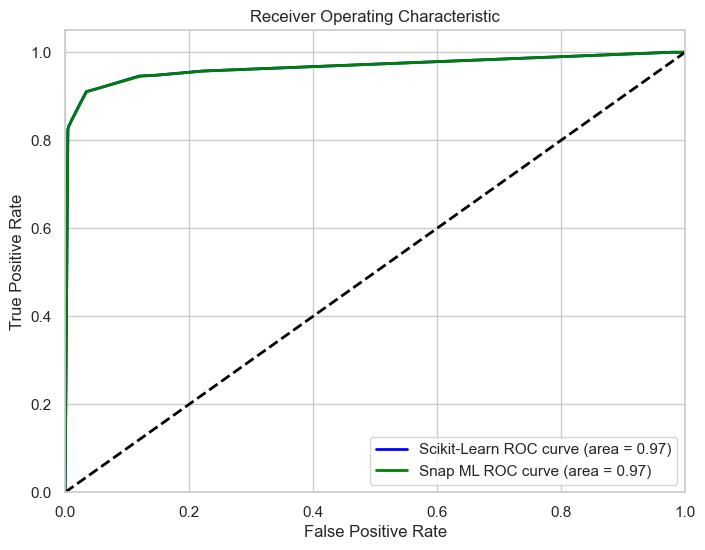

In [20]:
# Calculate ROC curve for Scikit-Learn model
fpr_sklearn, tpr_sklearn, _ = roc_curve(y_test, sklearn_pred)
roc_auc_sklearn = auc(fpr_sklearn, tpr_sklearn)

# Calculate ROC curve for Snap ML model
fpr_snapml, tpr_snapml, _ = roc_curve(y_test, snapml_pred)
roc_auc_snapml = auc(fpr_snapml, tpr_snapml)

# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_sklearn, tpr_sklearn, color='blue', lw=2, label=f'Scikit-Learn ROC curve (area = {roc_auc_sklearn:.2f})')
plt.plot(fpr_snapml, tpr_snapml, color='green', lw=2, label=f'Snap ML ROC curve (area = {roc_auc_snapml:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#Both curves overlap

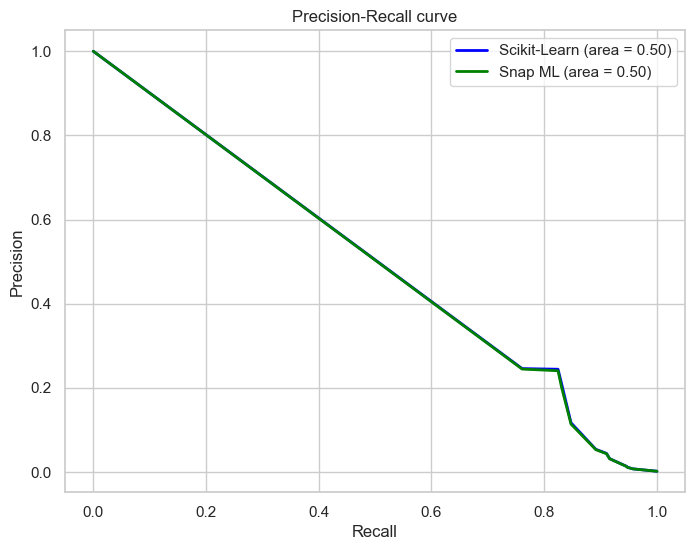

In [21]:
# Calculate precision-recall curve for Scikit-Learn model
from sklearn.metrics import precision_recall_curve, auc
precision_sklearn, recall_sklearn, _ = precision_recall_curve(y_test, sklearn_pred)
auc_precision_recall_sklearn = auc(recall_sklearn, precision_sklearn)

# Calculate precision-recall curve for Snap ML model
precision_snapml, recall_snapml, _ = precision_recall_curve(y_test, snapml_pred)
auc_precision_recall_snapml = auc(recall_snapml, precision_snapml)

# Plot the precision-recall curves
plt.figure(figsize=(8, 6))
plt.plot(recall_sklearn, precision_sklearn, color='blue', lw=2, label=f'Scikit-Learn (area = {auc_precision_recall_sklearn:.2f})')
plt.plot(recall_snapml, precision_snapml, color='green', lw=2, label=f'Snap ML (area = {auc_precision_recall_snapml:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="best")
plt.show()

#both curves overlap

As shown above both decision tree models provide the same score on the test dataset. However Snap ML runs the training routine 4.45x faster than Scikit-Learn. This is one of the advantages of using Snap ML: acceleration of training of classical machine learning models, such as linear and tree-based models. For more Snap ML examples, please visit [snapml-examples](https://ibm.biz/BdPfxP).


<div id="svm_sklearn">
    <h2>Build a Support Vector Machine model with Scikit-Learn</h2>
</div>


In [22]:
# import the linear Support Vector Machine (SVM) model from Scikit-Learn
from sklearn.svm import LinearSVC

# instatiate a scikit-learn SVM model
# to indicate the class imbalance at fit time, set class_weight='balanced'
# for reproducible output across multiple function calls, set random_state to a given integer value
sklearn_svm = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)

# train a linear Support Vector Machine model using Scikit-Learn
t0 = time.time()
sklearn_svm.fit(X_train, y_train)
sklearn_time = time.time() - t0
print("[Scikit-Learn] Training time (s):  {0:.2f}".format(sklearn_time))

[Scikit-Learn] Training time (s):  72.27


<div id="svm_snap">
    <h2>Build a Support Vector Machine model with Snap ML</h2>
</div>


In [23]:
# import the Support Vector Machine model (SVM) from Snap ML
from snapml import SupportVectorMachine

# in contrast to scikit-learn's LinearSVC, Snap ML offers multi-threaded CPU/GPU training of SVMs
# to use the GPU, set the use_gpu parameter to True
# snapml_svm = SupportVectorMachine(class_weight='balanced', random_state=25, use_gpu=True, fit_intercept=False)

# to set the number of threads used at training time, one needs to set the n_jobs parameter
snapml_svm = SupportVectorMachine(class_weight='balanced', random_state=25, n_jobs=4, fit_intercept=False)
# print(snapml_svm.get_params())

# train an SVM model using Snap ML
t0 = time.time()
model = snapml_svm.fit(X_train, y_train)
snapml_time = time.time() - t0
print("[Snap ML] Training time (s):  {0:.2f}".format(snapml_time))

[Snap ML] Training time (s):  12.39


<div id="svm_sklearn_snap">
    <h2>Evaluate the Scikit-Learn and Snap ML Support Vector Machine Models</h2>
</div>


In [24]:
# compute the Snap ML vs Scikit-Learn training speedup
training_speedup = sklearn_time/snapml_time
print('[Support Vector Machine] Snap ML vs. Scikit-Learn training speedup : {0:.2f}x '.format(training_speedup))

# run inference using the Scikit-Learn model
# get the confidence scores for the test samples
sklearn_pred = sklearn_svm.decision_function(X_test)

# evaluate accuracy on test set
acc_sklearn  = roc_auc_score(y_test, sklearn_pred)
print("[Scikit-Learn] ROC-AUC score:   {0:.3f}".format(acc_sklearn))

# run inference using the Snap ML model
# get the confidence scores for the test samples
snapml_pred = snapml_svm.decision_function(X_test)

# evaluate accuracy on test set
acc_snapml  = roc_auc_score(y_test, snapml_pred)
print("[Snap ML] ROC-AUC score:   {0:.3f}".format(acc_snapml))

[Support Vector Machine] Snap ML vs. Scikit-Learn training speedup : 5.83x 
[Scikit-Learn] ROC-AUC score:   0.984
[Snap ML] ROC-AUC score:   0.985


As shown above both SVM models provide the same score on the test dataset. However, as in the case of decision trees, Snap ML runs the training routine faster than Scikit-Learn. For more Snap ML examples, please visit [snapml-examples](https://ibm.biz/BdPfxP). Moreover, as shown above, not only is Snap ML seemlessly accelerating scikit-learn applications, but the library's Python API is also compatible with scikit-learn metrics and data preprocessors.


Now let's evaluate the quality of the SVM models trained above using the hinge loss metric (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.hinge_loss.html). Run inference on the test set using both Scikit-Learn and Snap ML models. Compute the hinge loss metric for both sets of predictions. Print the hinge losses of Scikit-Learn and Snap ML.


Hinge loss is a type of loss function used primarily with machine learning algorithms that are based on "margin," like 
Support Vector Machines (SVMs). It is used for "maximum-margin" classification, most notably for training classifiers like SVMs.

Basic Concept
The hinge loss is designed to measure the degree to which a prediction is incorrect. It is used in situations where the output 
can be one of two classes, typically labeled as -1 and +1. The hinge loss increases when the predicted value moves away from the actual value.

Mathematical Definition
The hinge loss for a given prediction is defined as:

L(y)=max(0,1−t⋅y)

Where:

y is the predicted value from the model (typically, the output of the decision function in SVMs).
t is the true label of the data, which is usually +1 or -1.
Characteristics
Zero Loss for Correct Predictions with Margin: If the predicted value y and the true label t have the same sign and the
magnitude of y is large enough (i.e., ∣y∣≥1 when t=±1), the hinge loss is zero. This means that not only does the prediction 
need to be correct, but it also needs to be made with a certain level of confidence or margin.

Linear Loss for Incorrect Predictions: If the prediction is incorrect, the hinge loss increases linearly with the distance 
from the correct margin. For SVMs, this encourages the model to not only make correct predictions but also to make them with a good margin.

Robustness: Hinge loss is robust to outliers. Since it only cares about the margin and not the exact distance from the 
decision boundary, it's less sensitive to outliers than, for example, squared error loss.

Use in SVMs
In SVMs, the hinge loss is used to maximize the margin between the data points of two classes. The optimization algorithm 
of SVMs seeks to minimize this loss, effectively pushing misclassified points to the correct side of the margin while also widening the margin as much as possible.

Comparison with Other Loss Functions
Hinge loss is different from other common loss functions like logistic loss or squared loss. While logistic loss focuses on 
estimating probabilities and squared loss on minimizing the error, hinge loss focuses on the margin of the decision, which is
crucial for classification tasks, especially where class separation is desired.

In summary, hinge loss is a key component in training classifiers, especially SVMs, where the goal is not just to classify
correctly but also to ensure a good margin of separation between classes.


In [25]:
# get the confidence scores for the test samples
sklearn_pred = sklearn_svm.decision_function(X_test)
snapml_pred  = snapml_svm.decision_function(X_test)

# import the hinge_loss metric from scikit-learn
from sklearn.metrics import hinge_loss

# evaluate the hinge loss from the predictions
loss_snapml = hinge_loss(y_test, snapml_pred)
print("[Snap ML] Hinge loss:   {0:.3f}".format(loss_snapml))

# evaluate the hinge loss metric from the predictions
loss_sklearn = hinge_loss(y_test, sklearn_pred)
print("[Scikit-Learn] Hinge loss:   {0:.3f}".format(loss_snapml))

# the two models should give the same Hinge loss

[Snap ML] Hinge loss:   0.228
[Scikit-Learn] Hinge loss:   0.228


Interpretation of the final metric result:
A hinge loss value of 0.228 has specific interpretations in the context of machine learning, particularly 
for models trained using the hinge loss function, like Support Vector Machines (SVMs). Here's what it means:

Average Loss Per Sample: The hinge loss value of 0.228 represents the average loss per data point in your test set. 
Hinge loss is typically calculated across all samples and then averaged.

Model Performance Indicator:

Below the Margin: A hinge loss of 0.228 suggests that, on average, the predictions are fairly close to being correct 
with the desired margin. In SVMs, the desired margin is typically set where the loss becomes zero (i.e., when the 
prediction is correct with a confidence greater than or equal to 1).
Misclassifications and Margin Violations: This value indicates a combination of some misclassifications and/or correct 
classifications that don’t meet the margin criterion. Specifically, it reflects the extent to which the model's predictions 
fall within the margin (for correct predictions) or on the wrong side of the decision boundary (for incorrect predictions).
Comparison to Ideal Loss:

Zero Loss: In an ideal scenario (perfect classification with sufficient margin), the hinge loss would be 0.
Your Model: A hinge loss of 0.228 indicates that while your model is performing reasonably well, there is room for improvement. 
The loss signifies that the model has made some errors or correct predictions that are too close to the decision boundary.
Relative Interpretation: The absolute value of the hinge loss is more meaningful when compared to other models or benchmarks. 
If another model on the same dataset yields a higher hinge loss, your model is comparatively better in terms of maintaining 
the margin and reducing misclassifications.

Guide for Model Improvement: This value can guide further model tuning. Reducing the hinge loss could involve strategies like 
feature engineering, hyperparameter tuning, or using more complex models, depending on other factors like the model's current bias-variance tradeoff.

In summary, a hinge loss of 0.228 indicates a decent model performance but highlights the potential for further reduction in 
misclassifications and better adherence to the margin criterion, especially in maximum-margin classifiers like SVMs.

In [26]:
#Thank to Andreea Anghel and IBM for inputs